In [1]:
!git clone https://github.com/niazwazir/NIfTI_FILES_CONVERT_INTO_IMAGES.git

Cloning into 'NIfTI_FILES_CONVERT_INTO_IMAGES'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 1.90 MiB | 6.61 MiB/s, done.


In [2]:
!ls

NIfTI_FILES_CONVERT_INTO_IMAGES  sample_data


In [3]:
cd NIfTI_FILES_CONVERT_INTO_IMAGES

/content/NIfTI_FILES_CONVERT_INTO_IMAGES


In [4]:
!ls

T2_FLAIR.nii


In [5]:
!mkdir output_images

In [6]:
!ls

output_images  T2_FLAIR.nii


In [7]:
!pip install nibabel

In [8]:
import os
import numpy as np
import nibabel as nib
from PIL import Image

def nii_to_png(nii_file_path, output_dir):
    # Load the NIfTI file
    img = nib.load(nii_file_path)
    img_data = img.get_fdata()

    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Iterate through each slice in the 3rd dimension (assuming axial slices)
    for i in range(img_data.shape[2]):
        slice_data = img_data[:, :, i]  # Get the i-th slice

        # Normalize slice data to [0, 255]
        slice_data_normalized = ((slice_data - np.min(slice_data)) / (np.max(slice_data) - np.min(slice_data)) * 255).astype(np.uint8)

        # Save the slice as a PNG file
        image = Image.fromarray(slice_data_normalized)
        image.save(os.path.join(output_dir, f'slice_{i}.png'))

# Example usage
if __name__ == "__main__":
    nii_file_path = 'T2_FLAIR.nii'  # Replace with your .nii file path
    output_dir = 'output_images'  # Replace with your desired output directory

    nii_to_png(nii_file_path, output_dir)
    print(f"Converted {nii_file_path} to PNG images in {output_dir}.")

Converted T2_FLAIR.nii to PNG images in output_images.


In [9]:
!ls

output_images  T2_FLAIR.nii


In [10]:
cd output_images/

/content/NIfTI_FILES_CONVERT_INTO_IMAGES/output_images


In [11]:
!ls

slice_0.png   slice_16.png  slice_22.png  slice_29.png	slice_35.png  slice_41.png  slice_4.png
slice_10.png  slice_17.png  slice_23.png  slice_2.png	slice_36.png  slice_42.png  slice_5.png
slice_11.png  slice_18.png  slice_24.png  slice_30.png	slice_37.png  slice_43.png  slice_6.png
slice_12.png  slice_19.png  slice_25.png  slice_31.png	slice_38.png  slice_44.png  slice_7.png
slice_13.png  slice_1.png   slice_26.png  slice_32.png	slice_39.png  slice_45.png  slice_8.png
slice_14.png  slice_20.png  slice_27.png  slice_33.png	slice_3.png   slice_46.png  slice_9.png
slice_15.png  slice_21.png  slice_28.png  slice_34.png	slice_40.png  slice_47.png


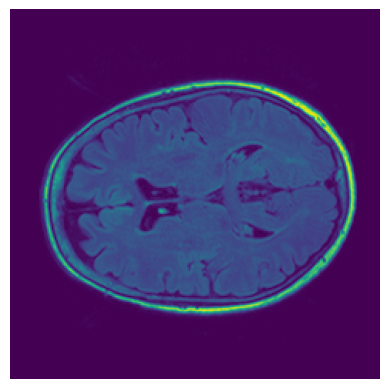

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread('slice_22.png')  # Replace with your image filename
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()